In [20]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [23]:
X, y = mnist["data"], mnist["target"]
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (70000, 784)
y shape:  (70000,)


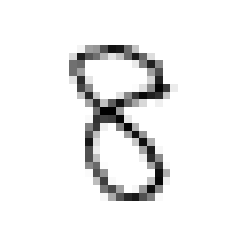

In [27]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[3600]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, 
          interpolation="nearest")
plt.axis("off")
plt.show()

In [43]:
y[3600]

8.0

In [44]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [45]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [49]:
y_train_8 = (y_train == 8.) # Select all 8s
y_test_8 = (y_test == 8.)

In [50]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_8)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [51]:
sgd_clf.predict([some_digit])

array([False])

In [54]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_8, cv = 3, scoring = "accuracy")

array([0.9338 , 0.91685, 0.93705])

In [57]:
from sklearn.base import BaseEstimator

class Never8Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
        
never_8_clf = Never8Classifier()
cross_val_score(never_8_clf, X_train, y_train_8, cv = 3, scoring = "accuracy")

array([0.9014 , 0.90155, 0.9045 ])

In [59]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3)

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_8, y_train_pred)

array([[51630,  2519],
       [ 1727,  4124]])

In [62]:
confusion_matrix(y_train_8, y_train_8)

array([[54149,     0],
       [    0,  5851]])

In [64]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_8, y_train_pred)

0.620803853680566

In [65]:
recall_score(y_train_8, y_train_pred)

0.7048367800376004

In [67]:
from sklearn.metrics import f1_score
f1_score(y_train_8, y_train_pred)

0.6601568753001441

In [79]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-1046.29939909])

In [80]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [82]:
threshold = -20000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [84]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_8, cv = 3,
                            method = "decision_function")

In [85]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_8, y_scores)

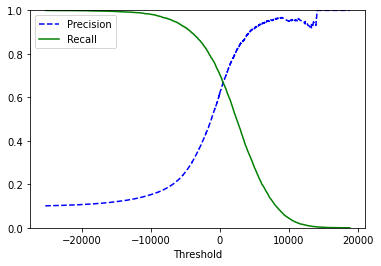

In [88]:
def plot_precision_recall_vs_threshold(precision, recalls, thresholds):
    plt.plot(thresholds, precision[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()